In [16]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [21]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
# Нормализуем данные
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5
# 
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape)
print(test_images.shape) 

(60000, 784)
(10000, 784)


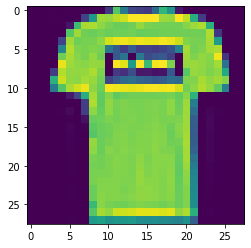

In [37]:
# Посмотрим изображения
plt.imshow((train_images[1,:].reshape((28,28))+1)/2)
plt.show()

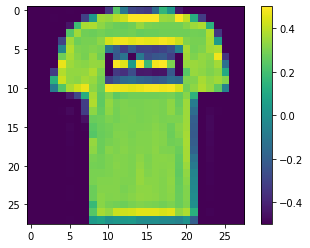

In [38]:
plt.figure()
plt.imshow(train_images[1].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

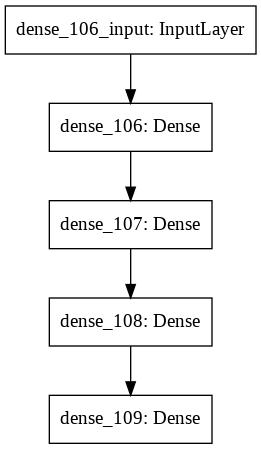

In [131]:
plot_model(model, to_file='model.png')

In [140]:
yy=to_categorical(train_labels,10)
yy[0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [122]:
train_labels[1]

0

In [180]:
# Создаем модель
model = Sequential()
model.add( Dense(200, activation='relu', input_shape=(784,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
# model.add(Dense(100, activation='relu'))
model.add(  Dense(10, activation='softmax'))

# Компилируем модель
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [181]:
# Обучаем модель
model.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=20,
  batch_size=None, validation_split=0.2
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 10s 208us/step - loss: 0.5640 - accuracy: 0.7990 - val_loss: 0.4726 - val_accuracy: 0.8319
Epoch 2/20
48000/48000 [==============================] - 10s 204us/step - loss: 0.4015 - accuracy: 0.8555 - val_loss: 0.3795 - val_accuracy: 0.8662
Epoch 3/20
48000/48000 [==============================] - 10s 204us/step - loss: 0.3606 - accuracy: 0.8695 - val_loss: 0.4081 - val_accuracy: 0.8564
Epoch 4/20
48000/48000 [==============================] - 10s 205us/step - loss: 0.3360 - accuracy: 0.8778 - val_loss: 0.3648 - val_accuracy: 0.8683
Epoch 5/20
48000/48000 [==============================] - 10s 204us/step - loss: 0.3126 - accuracy: 0.8847 - val_loss: 0.3421 - val_accuracy: 0.8806
Epoch 6/20
48000/48000 [==============================] - 10s 204us/step - loss: 0.3008 - accuracy: 0.8891 - val_loss: 0.3439 - val_accuracy: 0.8789
Epoch 7/20
48000/48000 [==============================] 

[0.37135120517611503, 0.8873000144958496]

In [182]:
N_test = 10
# Предсказываем первые 10 значений
predictions = model.predict(test_images[:N_test])

# Преобразуем результат предсказания и выводим
print(np.argmax(predictions, axis=1))

# Выводим правильный результат для сравнения
print(test_labels[:N_test])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [183]:
predictions[0,:]

array([2.0024971e-09, 6.3754797e-08, 3.6921574e-10, 2.6128873e-07,
       3.1392465e-11, 2.1999951e-05, 5.4813125e-07, 1.9559296e-04,
       1.5269512e-07, 9.9978143e-01], dtype=float32)

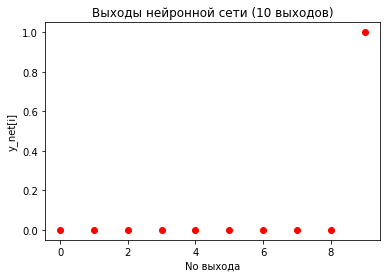

In [184]:
plt.plot(predictions[0,:], 'or')
plt.title('Выходы нейронной сети (10 выходов)')
plt.xlabel('No выхода')
plt.ylabel('y_net[i]')
plt.show()

In [185]:
y_pred = np.argmax(predictions, axis=1)

In [186]:
y_pred[:N_test]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

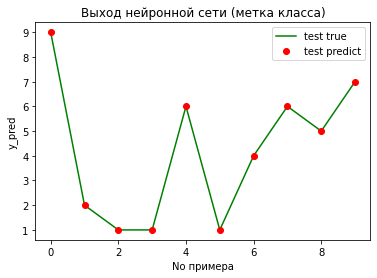

In [187]:
plt.plot(testn_labels[:N_test], 'g',label = 'test true')
plt.plot(y_pred[:N_test], 'or',label='test predict')
plt.legend()
plt.title('Выход нейронной сети (метка класса)')
plt.xlabel('No примера')
plt.ylabel('y_pred')
plt.show()

In [188]:
# Сохраняем модель
model.save_weights('model.h5')